In [1]:
import geopandas
import pandas
import sys
sys.path.append("field/src")
import utils

In [2]:
lon, lat = -97.385551, 41.964567

In [3]:
lon_m, lat_m, epsg_utm = utils.convert_degree_to_meters(lon, lat)

In [4]:
lon_m

633780.8816928765

In [5]:
lat_m

4647102.640750101

#### Want a field that is approx 10 acres (ie 40468 square meters)

Propose a field that is 100 meters wide by 400 meters long

`lon_m` and `lat_m` to be designated as the top right-corner of the field

In [6]:
lon_m_top_left = lon_m - 100
lat_m_top_left = lat_m

lon_m_bottom_left = lon_m_top_left
lat_m_bottom_left = lat_m - 400

lon_m_bottom_right = lon_m
lat_m_bottom_right = lat_m_bottom_left

In [14]:
list_tuple_coords = [
    (lon_m, lat_m),
    (lon_m_top_left, lat_m_top_left),
    (lon_m_bottom_left, lat_m_bottom_left),
    (lon_m_bottom_right, lat_m_bottom_right),
]

polygon_utm = utils.create_polygon_from_list_tuple(list_tuple_coords)

In [15]:
polygon_utm.area

40000.0

In [10]:
list_tuple_coords_degrees = [
    utils.convert_meters_to_degree(lon, lat, epsg_utm) for (lon, lat) in list_tuple_coords
]

In [11]:
list_tuple_coords_degrees

[(-97.38555100000002, 41.964566999999995),
 (-97.38675732371843, 41.96458396139896),
 (-97.3868481872366, 41.96098270170655),
 (-97.38564193139067, 41.96096574243743)]

In [12]:
polygon = utils.create_polygon_from_list_tuple(list_tuple_coords_degrees)

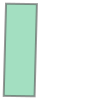

In [17]:
polygon

## Now that I have the boundary conditions of a field, I will populate that area with dummy data
--> assume 2 treatments and a control, that is T1 | Control | T2
--> Each treatment is comprised of 